In [22]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress


In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a8f0f0dd44c67317fb1e4cd99d9d4140


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

bjornevatn no
bethel us
mataura pf
belushya guba ru
mizdah ly
ratnagiri in
busselton au
thompson ca
bluff nz
bengkulu id
punta arenas cl
ucluelet ca
chopovychi ua
ngukurr au
chokurdakh ru
grand river south east mu
albany au
mys shmidta ru
castro cl
reconquista ar
puerto ayora ec
punta arenas cl
punta arenas cl
iqaluit ca
rikitea pf
torrington us
tucuman ar
nikolskoye ru
ushuaia ar
khatanga ru
dudinka ru
sakaiminato jp
ribeira grande pt
gizo sb
bredasdorp za
punta arenas cl
soluno-dmitriyevskoye ru
pretoria za
charcas mx
bambous virieux mu
nanortalik gl
teya ru
lewistown us
east london za
mar del plata ar
billings us
bubaque gw
mataura pf
puerto leguizamo co
gwanda zw
felanitx es
ushuaia ar
avarua ck
portland au
rikitea pf
taolanaro mg
rawson ar
jamestown sh
sioux lookout ca
baghdad iq
dikson ru
turukhansk ru
nizhneyansk ru
sentyabrskiy ru
saint-philippe re
punta arenas cl
chokurdakh ru
oussouye sn
saskylakh ru
mataura pf
kaseda jp
yaan cn
san jeronimo mx
busselton au
butaritari ki
kait

vaini to
rikitea pf
nguiu au
sibolga id
villarrica cl
georgetown sh
avarua ck
hambantota lk
vung tau vn
cherskiy ru
dikson ru
mataura pf
vaini to
ushuaia ar
atuona pf
tasiilaq gl
mys shmidta ru
punta arenas cl
corinth us
victoria sc
butaritari ki
mataura pf
kapaa us
mahebourg mu
pisco pe
bengkulu id
porto novo cv
belushya guba ru
krasnoarmeysk kz
atuona pf
rikitea pf
nexo dk
hermanus za
paredon mx
albany au
ukiah us
kodiak us
punta arenas cl
carnarvon au
tuktoyaktuk ca
caravelas br
castro cl
lebu cl
dunedin nz
mantua cu
saint anthony ca
tiksi ru
ushuaia ar
etchoropo mx
teguldet ru
biak id
yar-sale ru
victoria sc
khatanga ru
hasaki jp
chokurdakh ru
atuona pf
punta arenas cl
hithadhoo mv
khor qa
san cristobal ec
petropavlovsk-kamchatskiy ru
namibe ao
kaitangata nz
lixourion gr
mar del plata ar
ambilobe mg
kolda sn
punta arenas cl
chara ru
horta pt
ancud cl
norman wells ca
berbera so
kegayli uz
partenit ua
taolanaro mg
nikolskoye ru
gornopravdinsk ru
anadyr ru
guantanamo cu
malwan in
avar

ushuaia ar
thompson ca
yellowknife ca
rikitea pf
taolanaro mg
wanaka nz
rikitea pf
matsanga cg
barentsburg sj
aflu dz
mar del plata ar
klaksvik fo
kiunga pg
hay river ca
amderma ru
samusu ws
rikitea pf
barrhead ca
khatanga ru
hambantota lk
ushuaia ar
amderma ru
kapaa us
itacoatiara br
clyde river ca
saint-philippe re
port macquarie au
tarrafal cv
iqaluit ca
albany au
atuona pf
kapaa us
bredasdorp za
pokhara np
port alfred za
boa vista br
busselton au
norman wells ca
nanakuli us
batemans bay au
taolanaro mg
borovskoy kz
attawapiskat ca
mangrol in
tabialan ph
ushuaia ar
albany au
avarua ck
hobyo so
baldone lv
punta arenas cl
atuona pf
storforshei no
klaksvik fo
payo ph
codrington ag
ponta do sol cv
ugoofaaru mv
kapaa us
tasiilaq gl
ketchikan us
omsukchan ru
tumannyy ru
new richmond ca
rocha uy
filadelfia py
atuona pf
busselton au
kavaratti in
ushuaia ar
puerto ayora ec
ilulissat gl
tondano id
busselton au
bluff nz
tsihombe mg
umzimvubu za
jabiru au
hobart au
kodiak us
kaitangata nz
souil

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

632

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bjornevatn
City not found. Skipping...
Processing Record 2 of Set 1 | bethel
City not found. Skipping...
Processing Record 3 of Set 1 | mataura
City not found. Skipping...
Processing Record 4 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 5 of Set 1 | mizdah
City not found. Skipping...
Processing Record 6 of Set 1 | ratnagiri
City not found. Skipping...
Processing Record 7 of Set 1 | busselton
City not found. Skipping...
Processing Record 8 of Set 1 | thompson
City not found. Skipping...
Processing Record 9 of Set 1 | bluff
City not found. Skipping...
Processing Record 10 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 11 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 12 of Set 1 | ucluelet
City not found. Skipping...
Processing Record 13 of Set 1 | chopovychi
City not found. Skipping...
Processing Record 14 of Set 1 | ngukurr
City 

Processing Record 7 of Set 4 | high prairie
Processing Record 8 of Set 4 | nantucket
Processing Record 9 of Set 4 | kapaa
Processing Record 10 of Set 4 | kodiak
Processing Record 11 of Set 4 | shadegan
Processing Record 12 of Set 4 | nome
Processing Record 13 of Set 4 | rockport
Processing Record 14 of Set 4 | nioaque
Processing Record 15 of Set 4 | popondetta
Processing Record 16 of Set 4 | high rock
Processing Record 17 of Set 4 | hilo
Processing Record 18 of Set 4 | vila velha
Processing Record 19 of Set 4 | katangli
Processing Record 20 of Set 4 | wolsztyn
Processing Record 21 of Set 4 | fort-shevchenko
Processing Record 22 of Set 4 | vaini
Processing Record 23 of Set 4 | arman
Processing Record 24 of Set 4 | upernavik
Processing Record 25 of Set 4 | saint anthony
Processing Record 26 of Set 4 | lorengau
Processing Record 27 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 28 of Set 4 | goure
Processing Record 29 of Set 4 | nouadhibou
Processing Record 30 of Set

Processing Record 50 of Set 7 | villarrica
Processing Record 1 of Set 8 | georgetown
Processing Record 2 of Set 8 | hambantota
Processing Record 3 of Set 8 | vung tau
Processing Record 4 of Set 8 | corinth
Processing Record 5 of Set 8 | porto novo
Processing Record 6 of Set 8 | krasnoarmeysk
Processing Record 7 of Set 8 | nexo
Processing Record 8 of Set 8 | paredon
Processing Record 9 of Set 8 | ukiah
Processing Record 10 of Set 8 | caravelas
Processing Record 11 of Set 8 | dunedin
Processing Record 12 of Set 8 | mantua
Processing Record 13 of Set 8 | etchoropo
Processing Record 14 of Set 8 | teguldet
Processing Record 15 of Set 8 | biak
Processing Record 16 of Set 8 | hasaki
Processing Record 17 of Set 8 | khor
Processing Record 18 of Set 8 | san cristobal
Processing Record 19 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 20 of Set 8 | namibe
Processing Record 21 of Set 8 | lixourion
Processing Record 22 of Set 8 | ambilobe
Processing Record 23 of Set 8 | kolda
Processing Rec

Processing Record 38 of Set 11 | jishu
Processing Record 39 of Set 11 | methoni
Processing Record 40 of Set 11 | los llanos de aridane
Processing Record 41 of Set 11 | jose de freitas
Processing Record 42 of Set 11 | saurimo
Processing Record 43 of Set 11 | campos altos
Processing Record 44 of Set 11 | terrace bay
Processing Record 45 of Set 11 | inhambane
Processing Record 46 of Set 11 | torit
Processing Record 47 of Set 11 | road town
Processing Record 48 of Set 11 | constitucion
Processing Record 49 of Set 11 | bulgan
Processing Record 50 of Set 11 | dmytrivka
Processing Record 1 of Set 12 | angoram
Processing Record 2 of Set 12 | saleaula
City not found. Skipping...
Processing Record 3 of Set 12 | atar
Processing Record 4 of Set 12 | axim
Processing Record 5 of Set 12 | touros
Processing Record 6 of Set 12 | nuevo progreso
Processing Record 7 of Set 12 | jimeta
Processing Record 8 of Set 12 | puerto el triunfo
Processing Record 9 of Set 12 | maceio
Processing Record 10 of Set 12 | 

In [10]:
len(city_data)


539

In [11]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rawson,-43.3002,-65.1023,63.28,62,1,23.94,AR,2022-01-25 22:30:38
1,Jamestown,42.0970,-79.2353,18.99,41,100,11.50,US,2022-01-25 22:30:10
2,Sioux Lookout,50.1001,-91.9170,-9.02,70,20,6.91,CA,2022-01-25 22:30:40
3,Baghdad,33.3406,44.4009,40.91,70,0,2.30,IQ,2022-01-25 22:30:41
4,Dikson,73.5069,80.5464,11.75,91,100,30.13,RU,2022-01-25 22:30:41
5,Turukhansk,65.8167,87.9833,-17.12,100,88,5.99,RU,2022-01-25 22:30:42
6,Saint-Philippe,-21.3585,55.7679,74.79,79,94,14.07,RE,2022-01-25 22:30:44
7,Oussouye,12.4850,-16.5469,78.98,14,100,8.79,SN,2022-01-25 22:30:45
8,Saskylakh,71.9167,114.0833,10.31,87,100,18.41,RU,2022-01-25 22:30:46
9,Kaseda,31.4167,130.3167,45.63,72,68,10.45,JP,2022-01-25 22:30:47


In [12]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rawson,AR,2022-01-25 22:30:38,-43.3002,-65.1023,63.28,62,1,23.94
1,Jamestown,US,2022-01-25 22:30:10,42.0970,-79.2353,18.99,41,100,11.50
2,Sioux Lookout,CA,2022-01-25 22:30:40,50.1001,-91.9170,-9.02,70,20,6.91
3,Baghdad,IQ,2022-01-25 22:30:41,33.3406,44.4009,40.91,70,0,2.30
4,Dikson,RU,2022-01-25 22:30:41,73.5069,80.5464,11.75,91,100,30.13


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1643150850.6142778

In [16]:
today = time.strftime('%x')

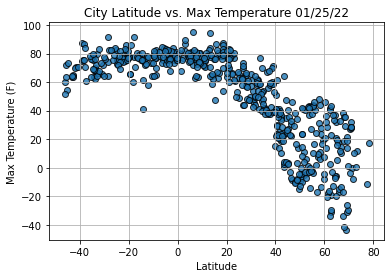

In [17]:
#build scatter plot for latitude vs. max temp
plt.scatter(lats, 
            max_temps, 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

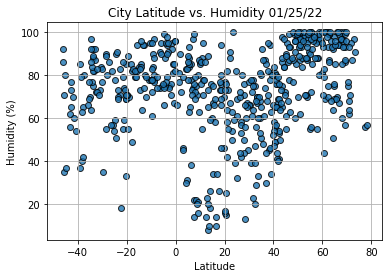

In [18]:
#build scatter plot for latitude vs. humidity
plt.scatter(lats, 
            humidity, 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

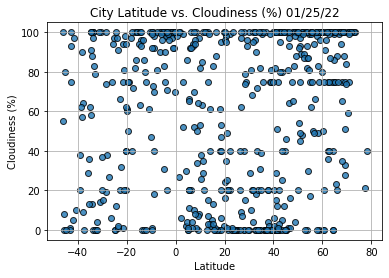

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

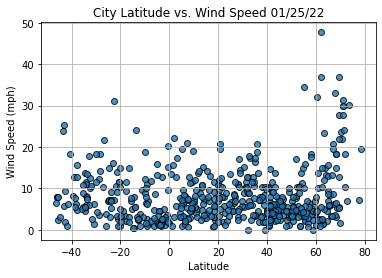

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [61]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f"R Value is {r_value:.2f}")

In [62]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

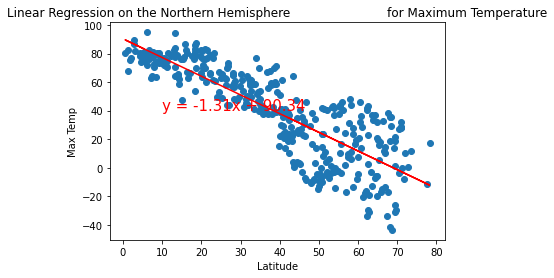

R Value is -0.84


In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

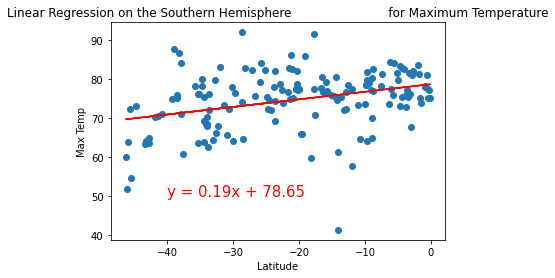

R Value is 0.34


In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-40,50))

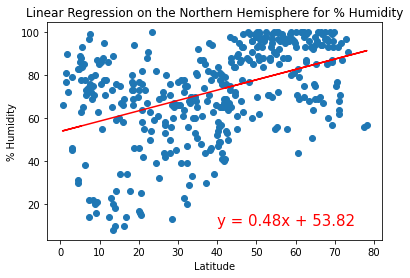

R Value is 0.44


In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

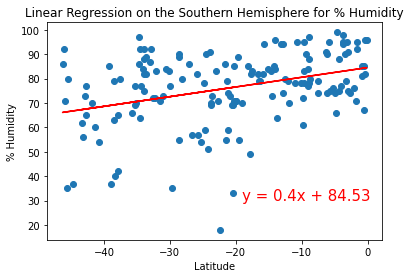

R Value is 0.36


In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-19,30))

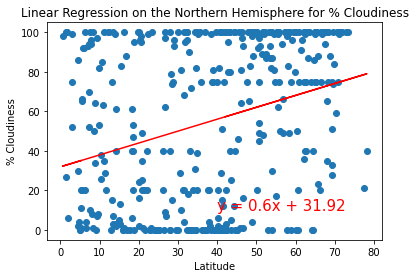

R Value is 0.30


In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

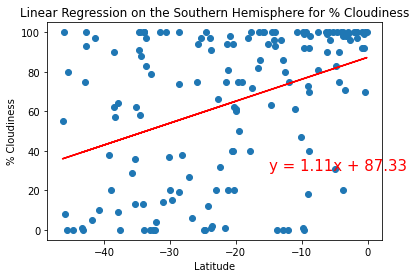

R Value is 0.40


In [70]:
# Linear regression on the southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-15,30))

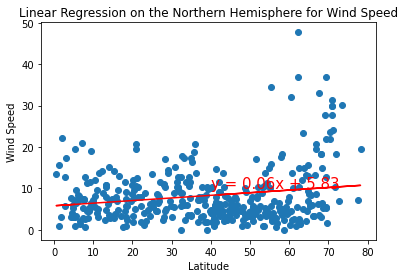

R Value is 0.19


In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,10))

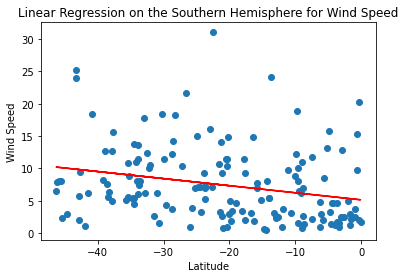

R Value is -0.26


In [72]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(40,10))